![GRASS.png](attachment:f8901281-a9f5-4360-93f4-b33b35c33c47.png)    ![osgeo.png](attachment:689e925d-db10-4ef0-a165-5427791e5f9c.png)

# Start up
Find GRASS GIS Python packages first, import them, and then initialize GRASS GIS session:

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [4]:
# Import Python standard library and IPython packages we need.
import os
import subprocess
import sys
from IPython.display import Image

In [5]:
os.getcwd()

'/home/jovyan'

In [6]:
subprocess.run(["grass", "--config", "python_path"], text=True)

/home/jovyan/grass/dist.x86_64-pc-linux-gnu/etc/python


CompletedProcess(args=['grass', '--config', 'python_path'], returncode=0)

In [7]:
# Ask GRASS GIS where its Python packages are.
sys.path.append('/home/jovyan/grass/dist.x86_64-pc-linux-gnu/etc/python')

In [8]:
sys.path

['/home/jovyan',
 '/srv/conda/envs/notebook/lib/python310.zip',
 '/srv/conda/envs/notebook/lib/python3.10',
 '/srv/conda/envs/notebook/lib/python3.10/lib-dynload',
 '',
 '/srv/conda/envs/notebook/lib/python3.10/site-packages',
 '/home/jovyan/grass/dist.x86_64-pc-linux-gnu/etc/python']

In [9]:
# Import the GRASS GIS packages needed.
import grass.script as gs
import grass.jupyter as gj

In [10]:
# Start GRASS Session
session = gj.init("/home/jovyan/data/", "testLocation", "PERMANENT")
print(session)

In [11]:
# Set working location of data
os.chdir('/home/jovyan/data/testLocation')
print(os.getcwd())

/home/jovyan/data/testLocation


<span style="font-family:Dubai; color:#555555; font-size:17px;">

Create map instance

In [12]:
# Create map instance
soy_map = gj.Map() #this for displaying it in this here notebook

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Tell OS that we want to use a renderer called cairo

In [13]:
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'

# Import yield data

<span style="font-family:Dubai; color:#555555; font-size:17px;">
    
## 1st GRASS SCRIPT!  
<li>import a vector
<li>from a file called "name"
<li>with Coordinate Reference System code ####
<li>call our map "thisname_map"
<li>Override projection check (use current location's projection). Assume that the dataset has the same projection as the current location

In [14]:
# Import data
gs.run_command("v.import", input="EX1.shp", epsg="4326", output="ex1_map", flags="o")

<span style="font-family:Dubai; color:#555555; font-size:17px;">

## "Light it up!" :)
    * vector colors module
    * for our map we're making
    * using an attribute in the data file
    * from the column we wont called "Dry_Yield"
    * use red-yellow-green (ryg) colors ramp!

In [15]:
## light.it.up
gs.run_command("v.colors", map="ex1_map", use="attr", column="Dry_Yield", color="ryg")

<span style="font-family:Dubai; color:#555555; font-size:17px;">
    
## "Show. Me. The Mappy!" <br> 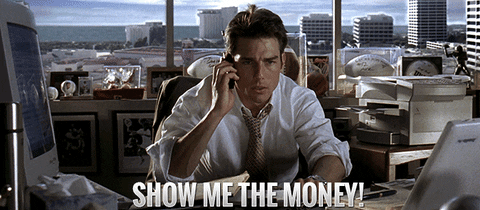
### (And hopefully it's all green like MONEY!)
<li>w
    <li>w
        <li>w
            <li>w

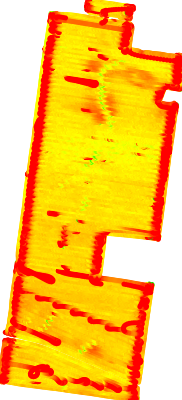

In [16]:
# "Show. me. the mappy"!
soymap = soy_map.run("d.vect", map="ex1_map", type="point", color="none", fill_color="none", width="1", icon="basic/circle", size="5")
soy_map.save(filename="ex1_map.png")
soy_map.save(filename="ex1_map.shp")
soy_map.show()

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [ ]:
soy_map.save(filename="ex1_map.png")
soy_map.save(filename="ex1_map.shp")
soy_map.show()

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [ ]:
# Set computational region to this new dataset
#gs.run_command("g.region", vector="ex1_map")

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

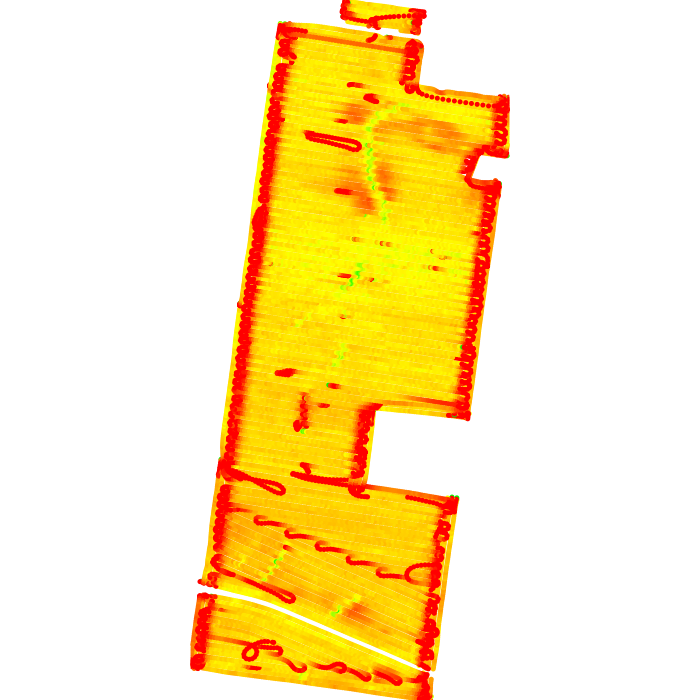

In [35]:
# Create detail/zoomed in map view
detail_map = gj.Map(height=700, width=700)

detail_map.run("d.vect", map="ex1_map", 
               type="point", color="none", 
               fill_color="none", width="1", 
               icon="basic/circle", size="5")
detail_map.show()


In [33]:
detail_map.save(filename="detailmap.png")
detail_map.save(filename="detailmap.shp")

------------------

# View attribute table to scrutinize data quality

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [38]:
from grass.script import vector
vector.vector_db(map="ex1_map")


#from grass.pygrass.vector import VectorTopo
#somename = VectorTopo('ex1_map')
#somename.open(mode-'r')
#dblinks = DBlinks(somename.c_mapinfo)
#dblinks
#DBlinks([Link(1, mapname, sqlite)])
#link = DBlinks[0]
#Link(1, mapname, sqliteabs)
#table = link.table()

##Here, DBlinks is a class that contains all the links of a vector map. 
##Each link is also a class (Link) that contains a specific link’s parameters. 
##The table() method of the link class return the linked table as a table object (Table).

{1: {'layer': 1,
  'name': 'EX1',
  'table': 'ex1_map',
  'key': 'cat',
  'database': '/home/jovyan/data/testLocation/PERMANENT/sqlite/sqlite.db',
  'driver': 'sqlite'}}

# Clean up table

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [41]:
# Edit attributes
gs.run_command("v.db.droprow", 
               input="ex1_map", 
               where="Speed = 0 OR Dry_Yield = 0", 
               output="NoZerosAllHeros")

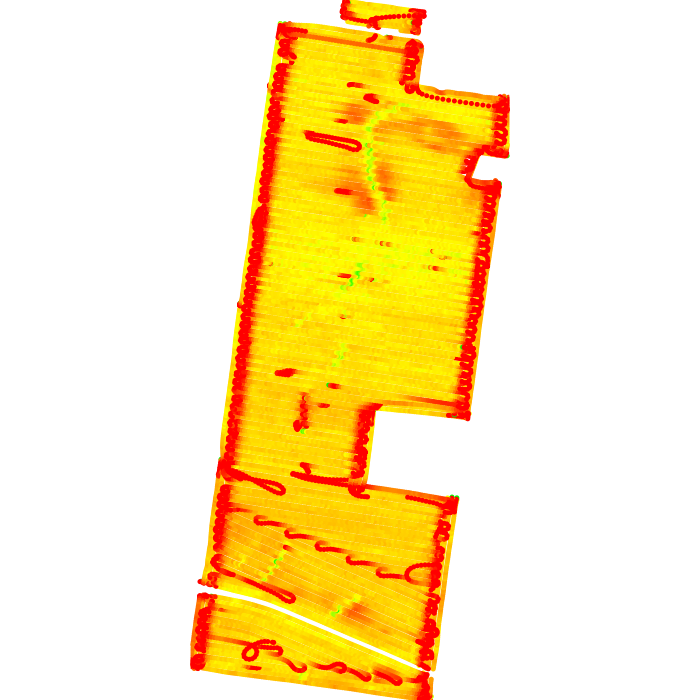

In [42]:
detail_map.show()

# Reload color for clean map

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [26]:
gs.run_command("d.vect", 
               flags="i", map="NoZerosAllHeros", 
               type="point", color="none", 
               fill_color="none", width="1", 
               icon="basic/circle", size="5")

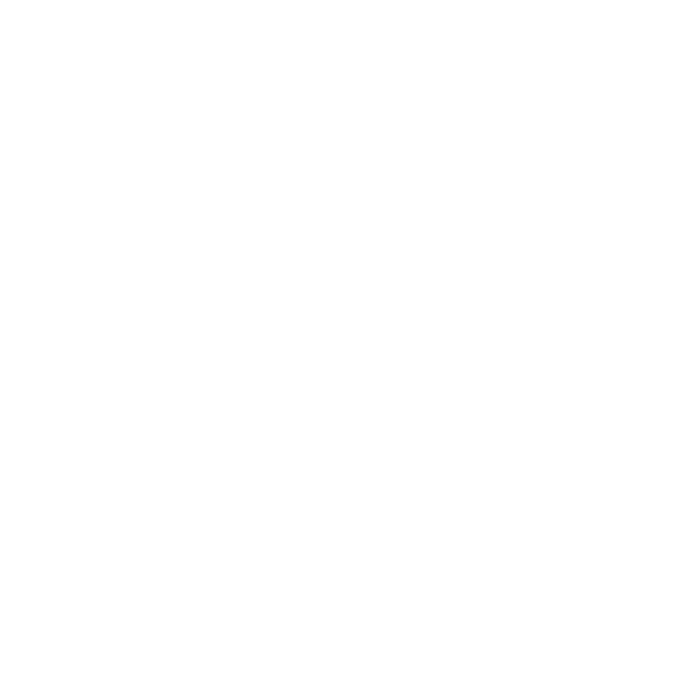

In [29]:
detail_map = gj.Map(height=700, width=700)
detail_map.run("d.vect", map="NoZerosAllHeros", 
               type="point", color="none", 
               fill_color="none", width="1", 
               icon="basic/circle", size="5")
detail_map.show()